<a href="https://colab.research.google.com/github/Varunrao123/Assignment-1_A/blob/master/Ass_3/Assi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.merge import concatenate
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


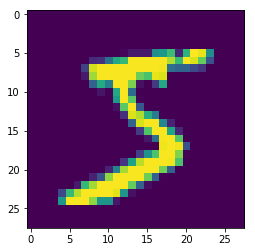

In [14]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [19]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator
model = Sequential()

 
model.add(Conv2D(8, kernel_size=(3, 3),strides=(1,1), activation='relu',padding='valid',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Conv2D(16, (3,3), strides =(1,1),padding='valid'))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3, 3),strides=(1,1) ,activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(16, (3, 3), activation='relu',padding='same'))

model.add(Conv2D(16, (3, 3), activation='relu',padding='valid'))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))          

model.add(Conv2D(10,1,activation='relu'))
model.add(Conv2D(10,1))
model.add(Flatten())
model.add(Activation('softmax'))
opt = Adam(lr=0.001, epsilon=1e-08, decay=0.0)




In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_244 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_42 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_245 (Conv2D)          (None, 24, 24, 32)        2336      
_________________________________________________________________
dropout_43 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_246 (Conv2D)          (None, 10, 10, 16)        4624      
_________________________________________________________________
dropout_44 (Dropout)         (None, 10, 10, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [142]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.5209 - acc: 0.8373
Epoch 2/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.1201 - acc: 0.9645
Epoch 3/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0898 - acc: 0.9727
Epoch 4/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.0750 - acc: 0.9775
Epoch 5/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0657 - acc: 0.9807
Epoch 6/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0592 - acc: 0.9821
Epoch 7/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0557 - acc: 0.9829
Epoch 8/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0513 - acc: 0.9846
Epoch 9/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0485 - acc: 0.9848
Epoch 10/10
60000/60000 [==============================] - 16s 260us/step - loss: 

In [143]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034824933895654976
Test accuracy: 0.9914


In [0]:
y_pred = model.predict(X_test)


In [73]:
print(y_pred[:9])
print(y_test[:9])

[[4.4759534e-19 1.6318692e-08 4.7861066e-11 6.3072425e-12 3.6905666e-07
  2.3773979e-18 3.4025030e-19 9.9999940e-01 1.2560256e-11 2.7041915e-07]
 [1.7030674e-05 2.8142868e-08 9.9994195e-01 2.4885007e-09 4.4050985e-11
  1.0662858e-15 1.0292186e-08 4.0464420e-05 3.3132724e-07 1.2530727e-07]
 [5.0961834e-08 9.9978048e-01 3.5876378e-06 9.7017607e-07 4.3563700e-06
  2.9940311e-05 3.4044177e-05 8.5910142e-05 5.4874738e-05 5.8764267e-06]
 [9.9990511e-01 1.0575148e-12 4.6912507e-10 5.0541654e-08 4.5023318e-11
  6.9776524e-07 9.1342510e-05 1.9271087e-09 2.8068901e-06 6.7727996e-08]
 [7.7157559e-14 1.3722064e-10 2.4061220e-09 1.7382459e-16 9.9999392e-01
  3.7792411e-14 1.3850211e-08 4.1339111e-14 1.0336882e-09 6.1116880e-06]
 [5.0887490e-08 9.9978167e-01 3.5981063e-06 9.3890236e-07 4.4057178e-06
  3.0024839e-05 3.5309553e-05 8.3442268e-05 5.4793229e-05 5.8944343e-06]
 [6.1138507e-17 4.4702003e-13 1.9680920e-11 3.3817076e-20 9.9999952e-01
  2.9855807e-17 1.9300156e-10 3.3537194e-17 6.4148825e-12 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()